# Week 3
Depending on what seems more relevant in your graph, pick one of the following local notions:
- Decay centrality
- Betweeness centrality
- Closeness centrality
- Clustering
- Any other notions that you invent
1) Provide a code computing the given centrality using basic functions of networkx (you are not allowed touse directly nx."what you want").
2) Discuss why you picked this measure and who is the most central in your network based on yourchoice.
3) Provide the cumulative distribution for this centrality and give a graphical representation of your graph(log-log, log or normal representation as you think it is more relevant).

Based on our graph, we chose to compute the *Closeness Centrality*: why? \
Closeness centrality is insightful for our graph because it allows us to understand how close a node (a character in this case) is to all other nodes in the network, indicating they are central to the unfolding of the story. These characters are likely involved in multiple storylines or interact with multiple groups of characters, making them key figures in the narrative.

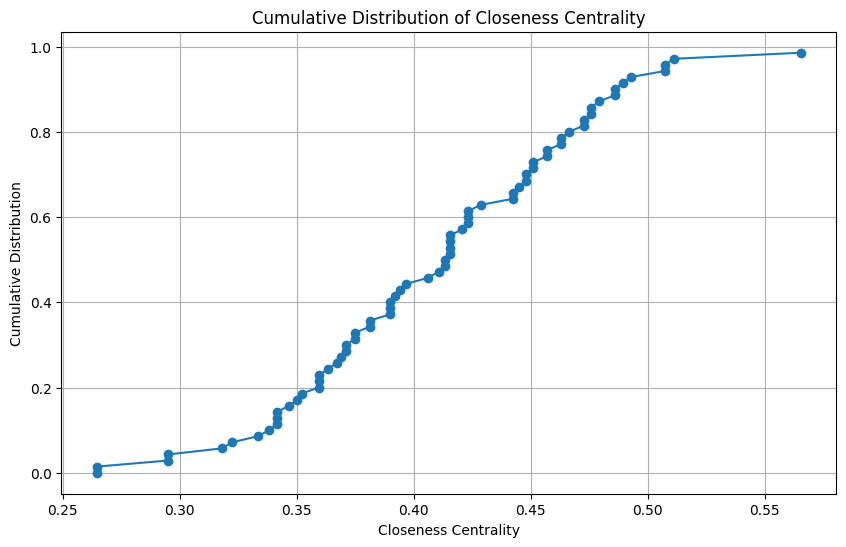

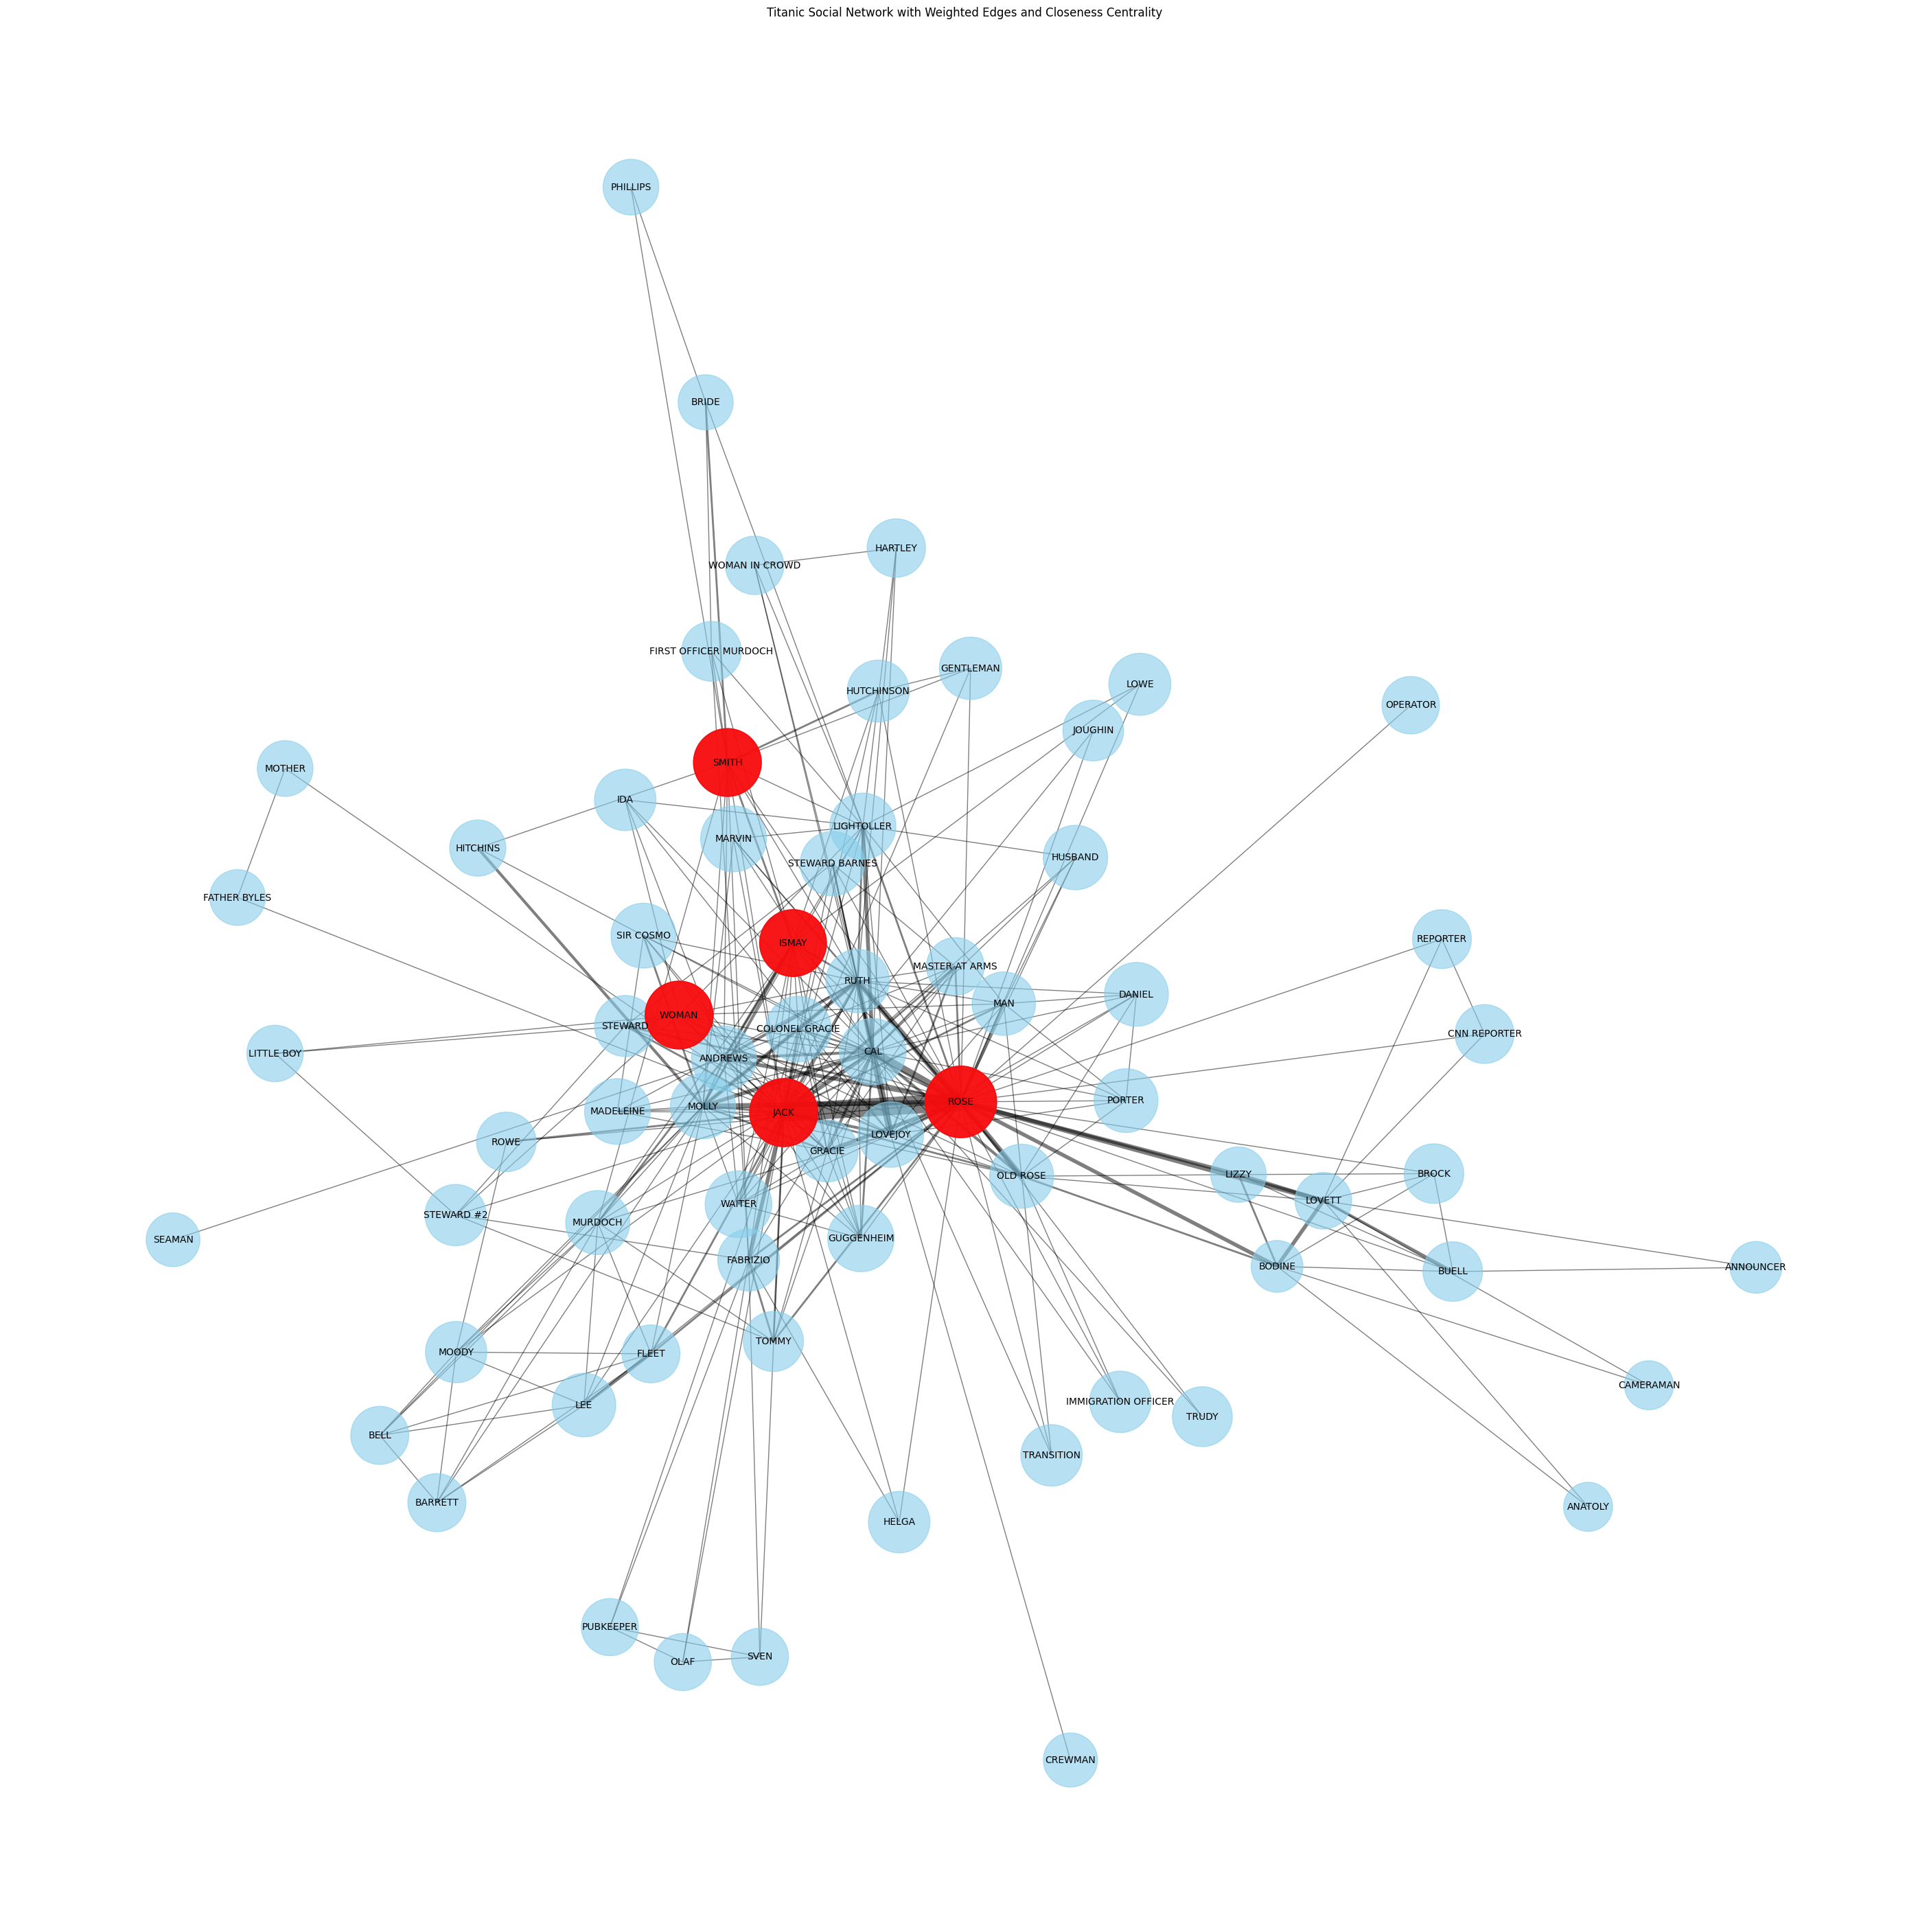

In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to load the graph from CSV files
def load_graph(nodes_file_path, edges_file_path):
    # Read nodes from the CSV file
    G = nx.Graph()
    with open('../Graph/nodes.csv', 'r') as file: # Open the CSV file
        reader = csv.DictReader(file) # DictReader is a class that reads a CSV file and converts it into a dictionary
        for row in reader: # Each row is a dictionary
            G.add_node(row['Id'], label=row['Label']) # Add a node to the graph with the node id and label

    # Read edges from the CSV file
    with open('../Graph/edges.csv', 'r') as file: 
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight

    return G

# Function to compute closeness centrality using basic NetworkX functions
def compute_closeness_centrality(G):
    closeness = {}
    n_minus_1 = G.number_of_nodes() - 1
    for node in G.nodes:
        shortest_path_lengths = nx.single_source_dijkstra_path_length(G, node, weight='weight')
        closeness[node] = n_minus_1 / sum(shortest_path_lengths.values())
    return closeness

# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Load the graph
G = load_graph('nodes.csv', 'edges.csv')

# Compute closeness centrality
closeness_centrality = compute_closeness_centrality(G)

# Plot the cumulative distribution for closeness centrality
plot_cumulative_distribution(closeness_centrality, 'Closeness Centrality')

# Custom plot to visualize the graph
id_to_name = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(36, 36))
pos = nx.spring_layout(G, seed=42)
node_sizes = [closeness_centrality[node] * 10000 for node in G.nodes()]
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
labels = {node: id_to_name[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
top_5_nodes = list(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_5_nodes], node_color='red', node_size=[closeness_centrality[node] * 10000 for node, _ in top_5_nodes], alpha=0.9)
plt.title("Titanic Social Network with Weighted Edges and Closeness Centrality")
plt.axis("off")
plt.show()
